### 多元线性回归

多元线性回归是一种将一个连续响应变量在多个特征上进行回归的简单线性回归泛化形式

通常请况下将Y表示为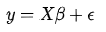
其中X被称为设计矩阵，是一个由训练实例解释变量组成的m*n的矩阵。m表示训练实力的数量，n表示特征的数量。

是一个由模型参数值组成的列向量

In [1]:
from numpy.linalg import inv
from numpy import dot, transpose

In [2]:
X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[9],[13],[17.5],[18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [3]:
from numpy.linalg import lstsq
X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[9],[13],[17.5],[18]]
print(lstsq(X, y)[0])

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


<ipython-input-3-3b132c003128>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  print(lstsq(X, y)[0])


In [4]:
from sklearn.linear_model import LinearRegression

X = [[6,2], [8,1], [10,0], [14, 2], [18, 0]]
y = [[7],[9],[13],[17.5],[18]]
model = LinearRegression()
model.fit(X,y)
X_test = [[8,2], [9,0],[11,2],[16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


In [5]:
from sklearn.linear_model import LinearRegression

X = [[6,2], [8,1],[10,0],[14,2],[18,0]]
y = [[7],[9],[13],[17.5],[18]]

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
X_test = [[8,2],[9,0],[11,2],[16,2],[12,0]]
y_test = [[11],[8.5],[15],[18],[11]]
predictions = model.predict(X_test)

In [7]:
predictions

array([[10.0625    ],
       [10.28125   ],
       [13.09375   ],
       [18.14583333],
       [13.3125    ]])

In [8]:
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' %(prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


In [9]:
for i, prediction in enumerate(predictions):
    print(i)
    print(prediction)

0
[10.0625]
1
[10.28125]
2
[13.09375]
3
[18.14583333]
4
[13.3125]


In [10]:
model.score(X_test, y_test)

0.7701677731318468

### 多项式回归

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [12]:
X_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]
X_test = [[6],[8],[11],[16]]
y_test = [[8],[12],[15],[18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0],1))

In [14]:
xx.reshape(xx.shape[0],1)

array([[ 0.        ],
       [ 0.26262626],
       [ 0.52525253],
       [ 0.78787879],
       [ 1.05050505],
       [ 1.31313131],
       [ 1.57575758],
       [ 1.83838384],
       [ 2.1010101 ],
       [ 2.36363636],
       [ 2.62626263],
       [ 2.88888889],
       [ 3.15151515],
       [ 3.41414141],
       [ 3.67676768],
       [ 3.93939394],
       [ 4.2020202 ],
       [ 4.46464646],
       [ 4.72727273],
       [ 4.98989899],
       [ 5.25252525],
       [ 5.51515152],
       [ 5.77777778],
       [ 6.04040404],
       [ 6.3030303 ],
       [ 6.56565657],
       [ 6.82828283],
       [ 7.09090909],
       [ 7.35353535],
       [ 7.61616162],
       [ 7.87878788],
       [ 8.14141414],
       [ 8.4040404 ],
       [ 8.66666667],
       [ 8.92929293],
       [ 9.19191919],
       [ 9.45454545],
       [ 9.71717172],
       [ 9.97979798],
       [10.24242424],
       [10.50505051],
       [10.76767677],
       [11.03030303],
       [11.29292929],
       [11.55555556],
       [11

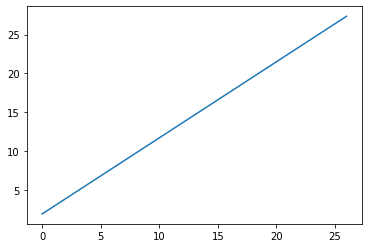

In [15]:
plt.plot(xx,yy)

In [16]:
quadratic_featurizer = PolynomialFeatures(degree = 2)

In [17]:
quadratic_featurizer

PolynomialFeatures()

In [18]:
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.fit_transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)

LinearRegression()

In [19]:
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0],1))

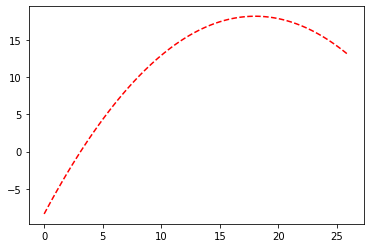

In [20]:
plt.plot(xx,regressor_quadratic.predict(xx_quadratic), c= "r",linestyle = "--")

Text(0.5, 1.0, 'Pizza price regressed on diameter')

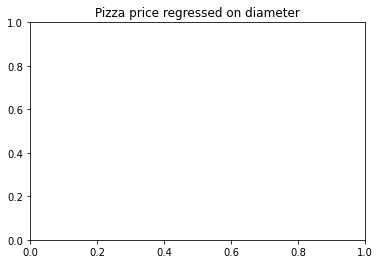

In [21]:
plt.title("Pizza price regressed on diameter")

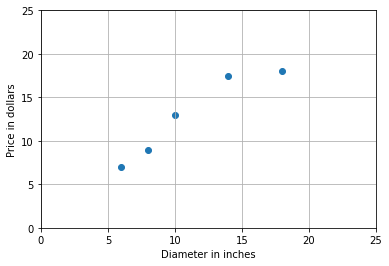

In [22]:
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0,25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [23]:
print(X_train)

[[6], [8], [10], [14], [18]]


In [24]:
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared',
     regressor_quadratic.score(X_test_quadratic, y_test))

[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345073


# 代码样例：


from sklearn.linear_model import LinearRegression

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

df = pd.read_csv('./Winequality-red.csv', sep = "r")

X = df[list(df.columns)[:-1]]

y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_prediction = regressor.predict(X_test)

print('R-squared: %s' % regressor.score(X_test, y_test))

交叉验证：
在scikit-learn中，我们可以非常容易的使用交叉验证，我们引入：from sklearn.model_selection import cross_val_score。在引入cross_val_score后我们可以很容易的使用交叉验证的方法。交叉验证的方法可以帮助我们更好的评估预测器在某特定数据集上的预测性能。在cross_val_score中我们用：cv关键字指定要做的交叉验证的次数。每次验证就是对该模型在数据集上进行一次拟合。最后sross_val_score的分数就是多次拟合结果分数的平均。


在机器学习中我们使用梯度下降法来求出能使代价函数极小化对应的参数值。梯度下降法的意识是说利用逐渐下降的梯度来找到一个函数的局部最小值。

什么是梯度：梯度就是在某一点上方向导数的最大值。就是在某一点上函数变化率最大的方向。通过让梯度的值逐渐减小来达到找到局部最小值的方法。

#### 梯度下降法来估计一个模型的参数举例

In [30]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [32]:
X_train

array([[3.23700e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94630e+02, 2.94000e+00],
       [1.13290e-01, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
        3.91250e+02, 1.13800e+01],
       [7.02200e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.93230e+02, 1.01100e+01],
       ...,
       [2.59406e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.27360e+02, 2.66400e+01],
       [1.71340e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.44910e+02, 1.57600e+01],
       [5.20580e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.88450e+02, 9.54000e+00]])

In [35]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [36]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

在进行机器学习建模的时候我们的常规方法是：
1、首先要将数据进行标准化处理
2、其次我们要将数据分为训练集和测试集
3、对数据进行拟合，并对模型结果在测试集上进行测试

In [44]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train_scaler = X_scaler.fit_transform(X_train)
y_train_scaler = y_scaler.fit_transform(y_train.reshape(-1,1))
X_test_scaler = X_scaler.fit_transform(X_test)
y_test_scaler = y_scaler.fit_transform(y_test.reshape(-1,1))
regessor_SG = SGDRegressor(loss = 'squared_loss')
fit_regessor_SG = cross_val_score(regessor_SG, X_train_scaler, y_train_scaler, cv= 5)
print('Cross validation r_squared scores: %s' % fit_regessor_SG)
print('Average cross validation r-squared score: %s' % np.mean(fit_regessor_SG))
regessor_SG.fit(X_train_scaler, y_train_scaler)
print('Test set r-squared score %s' % regessor_SG.score(X_test_scaler, y_test_scaler))
      

Cross validation r_squared scores: [0.70258304 0.72567596 0.67887325 0.72212318 0.80156976]
Average cross validation r-squared score: 0.7261650362432824
Test set r-squared score 0.6130145959526693


G:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
G:\anaconda\lib\site-packages\sklearn\utils\